In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
notes = '''booking_date → Date when the ticket was booked.

journey_date → Date of actual travel.

trnno → Train number (e.g., 22222).

brdpt_code → Boarding point station code (e.g., AGC = Agra Cantt).

resupto_code → Reservation up to station code (e.g., KYN = Kalyan Jn).

cls → Class of travel (e.g., 3A = AC 3-Tier).

PSGN → Number of passengers booked.'''
df= pd.read_csv("../CRIS_data/train_demand/demand_22222.csv")
df.head()


,'booking_date','journey_date','trnno','brdpt_code','resupto_code','cls','PSGN'
0,2023-04-06,2023-08-01,'22222','AGC ','KYN ','3A ',6
1,2023-04-14,2023-08-01,'22222','NZM ','NK ','3A ',1
2,2023-05-02,2023-08-01,'22222','NZM ','CSMT','1A ',4
3,2023-05-03,2023-08-01,'22222','NZM ','NK ','2A ',2
4,2023-05-14,2023-08-01,'22222','NZM ','NK ','3A ',1


In [13]:
df.shape

(384534, 7)

In [14]:
note =  '''AGC → Agra Cantt (Uttar Pradesh)

NZM → Hazrat Nizamuddin (Delhi)

VGLJ → Virangana Lakshmibai Jhansi Junction (Jhansi, Uttar Pradesh, earlier code JHS)

GWL → Gwalior Junction (Madhya Pradesh)

JL → Jalgaon Junction (Maharashtra)

BPL → Bhopal Junction (Madhya Pradesh)

NK → Nasik Road (Maharashtra)

KYN → Kalyan Junction (Maharashtra)

BSL → Bhusaval Junction (Maharashtra)

CSMT → Chhatrapati Shivaji Maharaj Terminus (Mumbai, Maharashtra)
'''
(df["'brdpt_code'"].unique())



array(["'AGC '", "'NZM '", "'VGLJ'", "'GWL '", "'JL  '", "'BPL '",
       "'NK  '", "'KYN '", "'BSL '"], dtype=object)

In [15]:
df["'resupto_code'"].unique()

array(["'KYN '", "'NK  '", "'CSMT'", "'VGLJ'", "'JL  '", "'BPL '",
       "'GWL '", "'AGC '", "'BSL '"], dtype=object)

In [16]:
df["'journey_date'"].value_counts()

'journey_date'
2024-11-03    763
2024-08-19    739
2024-12-14    733
2025-01-04    721
2025-03-16    714
             ... 
2023-10-10    354
2023-10-18    351
2023-09-21    347
2024-10-31    256
2023-11-12    251
Name: count, Length: 731, dtype: int64

In [17]:
df["'PSGN'"].describe()

count    384534.000000
mean          3.087672
std           4.497931
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         209.000000
Name: 'PSGN', dtype: float64

In [ ]:
print(df.columns.tolist())


["'booking_date'", "'journey_date'", "'trnno'", "'brdpt_code'", "'resupto_code'", "'cls'", "'PSGN'"]


In [20]:
df.columns = df.columns.str.strip().str.replace("'", "")


In [5]:
import datetime

# Define some major Indian holidays
holidays = {
    "26-01-2025": "Republic Day",
    "15-08-2025": "Independence Day",
    "02-10-2025": "Gandhi Jayanti",
    "25-12-2025": "Christmas",
    "20-10-2025": "Diwali",
    "31-03-2025": "Holi",
    "05-09-2025": "Eid",
    "15-09-2025": "Yashu Bday"
}

# Input date
date_str = input("Enter date (DD-MM-YYYY): ")
try:
    input_date = datetime.datetime.strptime(date_str, "%d-%m-%Y").date()
except ValueError:
    print("❌ Invalid format. Please enter in DD-MM-YYYY format.")
    exit()

weekday = input_date.weekday()  # Monday=0 ... Sunday=6
is_peak = False

# Check if the date itself is a holiday
if date_str in holidays:
    holiday_name = holidays[date_str]
    print(f"✅ {date_str} is {holiday_name} (Holiday in India).")
    is_peak = True

# Check if it's a weekend
if weekday >= 5:
    print(f"⚡ {date_str} is a weekend (Saturday/Sunday), likely a peak travel day.")
    is_peak = True

# Check if it's Thursday before a Friday holiday
if weekday == 3:  # Thursday
    next_day = input_date + datetime.timedelta(days=1)
    next_day_str = next_day.strftime("%d-%m-%Y")
    if next_day_str in holidays and next_day.weekday() == 4:
        print(f"⚡ {date_str} (Thursday) may be a peak travel day because {next_day_str} is a holiday ({holidays[next_day_str]}).")
        is_peak = True

# Check if it's Friday before a Monday holiday
if weekday == 4:  # Friday
    next_monday = input_date + datetime.timedelta(days=3)
    next_monday_str = next_monday.strftime("%d-%m-%Y")
    if next_monday_str in holidays and next_monday.weekday() == 0:
        print(f"⚡ {date_str} (Friday) may be a peak travel day because {next_monday_str} is a holiday ({holidays[next_monday_str]}).")
        is_peak = True

# Optional: Thursday before a Friday that is also before a Monday holiday
if not is_peak:
    print(f"✅ {date_str} is not a peak travel day based on nearby holidays and weekends.")


⚡ 12-09-2025 (Friday) may be a peak travel day because 15-09-2025 is a holiday (Yashu Bday).


In [28]:
# Clean class column
df["cls"] = df["cls"].str.strip().str.replace("'", "")
print(df["cls"].unique())


['3A ' '1A ' '2A ']


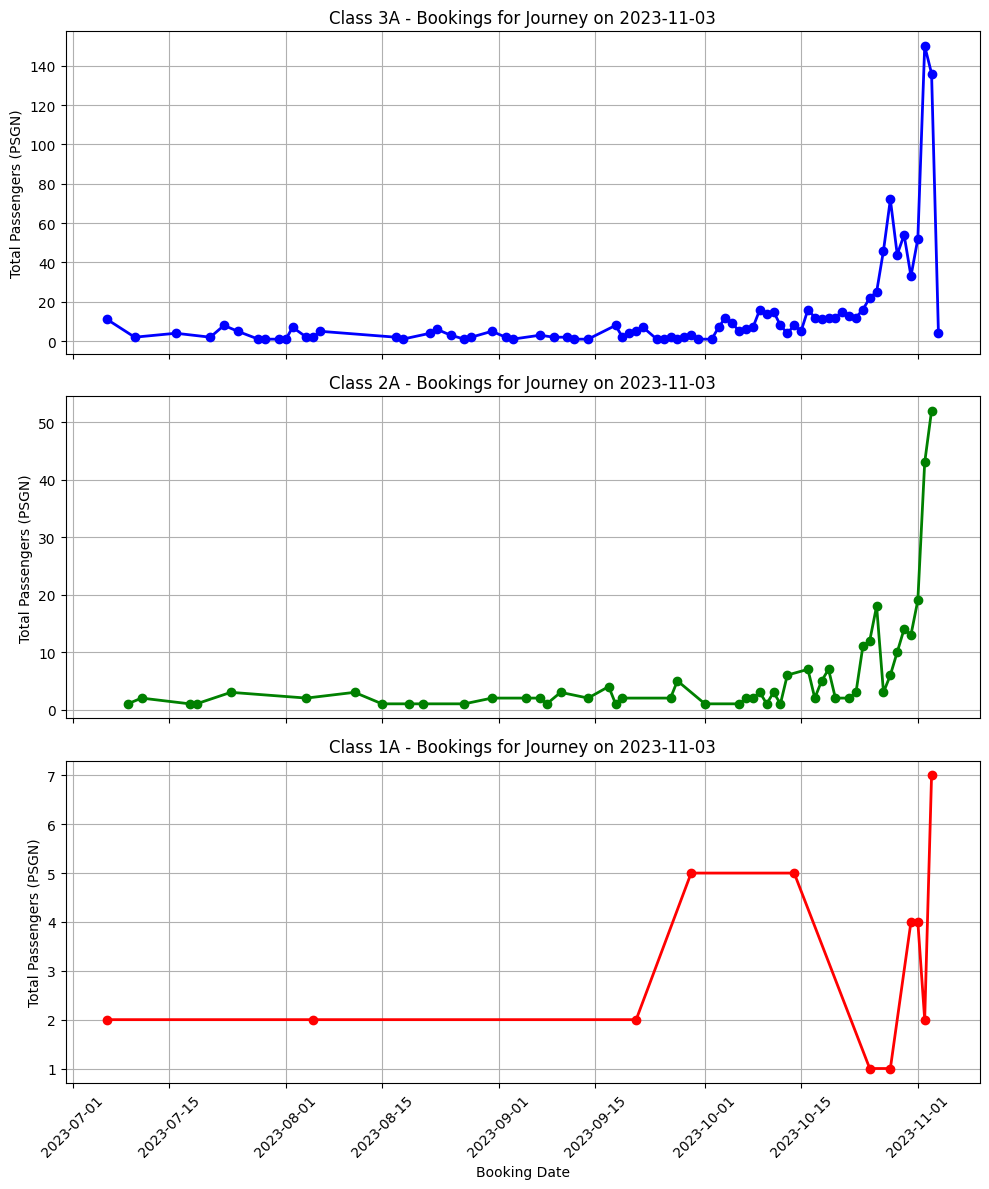

In [31]:
# Ensure dates are datetime
df["booking_date"] = pd.to_datetime(df["booking_date"])
df["journey_date"] = pd.to_datetime(df["journey_date"])

# Clean cls column (remove spaces/quotes if any)
df["cls"] = df["cls"].str.strip().str.replace("'", "")

# Target journey date
target_journey_date = "2023-11-03"

# Filter only target journey date
df_filtered = df[df["journey_date"] == target_journey_date]

# Define classes and colors
classes = ["3A", "2A", "1A"]
colors = ["b", "g", "r"]

# Create subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

for ax, cls_type, color in zip(axes, classes, colors):
    subset = df_filtered[df_filtered["cls"] == cls_type]
    booking_summary = subset.groupby("booking_date")["PSGN"].sum().reset_index()
    
    ax.plot(
        booking_summary["booking_date"],
        booking_summary["PSGN"],
        marker="o",
        linewidth=2,
        color=color
    )
    ax.set_title(f"Class {cls_type} - Bookings for Journey on {target_journey_date}")
    ax.set_ylabel("Total Passengers (PSGN)")
    ax.grid(True)

axes[-1].set_xlabel("Booking Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

  cls  PSGN  Total_Class_Tickets  Percentage                    Window
0  1A    17                   35       48.57               Last 5 Days
1  2A   151                  292       51.71               Last 5 Days
2  3A   469                  999       46.95               Last 5 Days
3  1A     7                   35       20.00  Last 1 Month (6-30 days)
4  2A    97                  292       33.22  Last 1 Month (6-30 days)
5  3A   393                  999       39.34  Last 1 Month (6-30 days)
6  1A     7                   35       20.00         60-31 days before
7  2A    25                  292        8.56         60-31 days before
8  3A    54                  999        5.41         60-31 days before


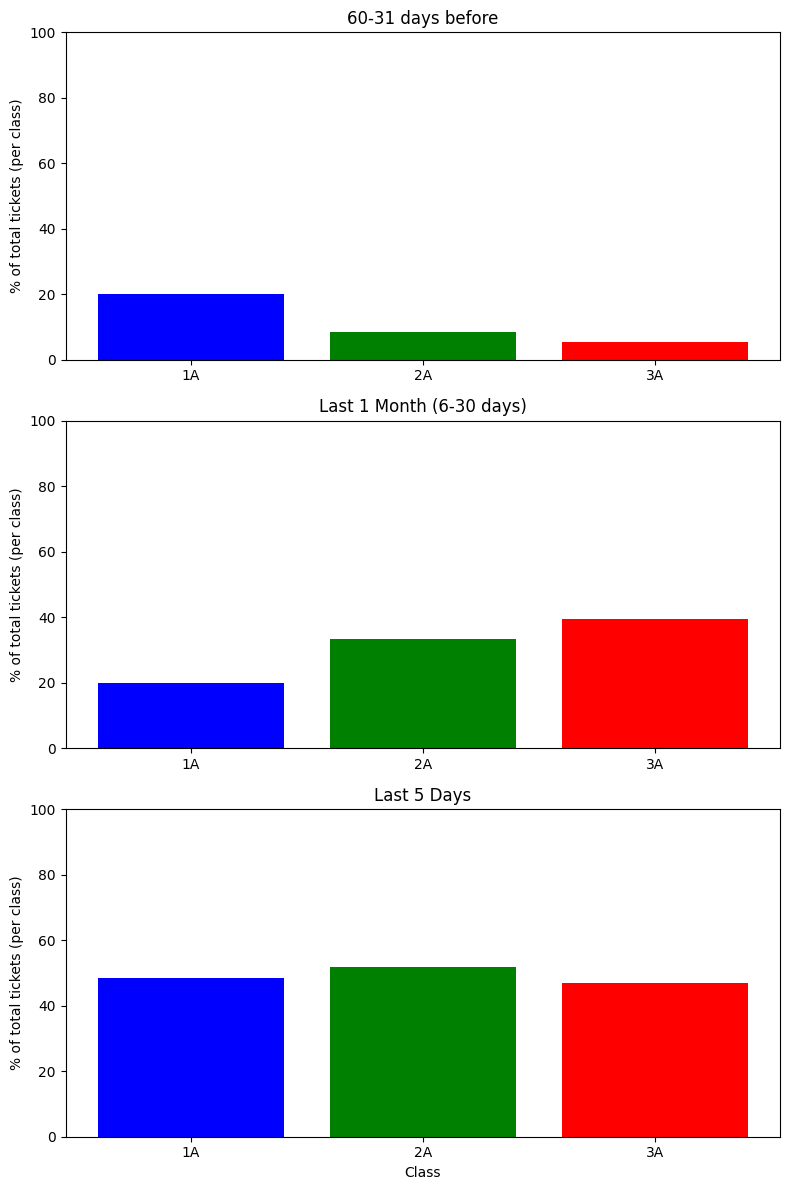

In [38]:

# Convert to datetime
df["booking_date"] = pd.to_datetime(df["booking_date"])
df["journey_date"] = pd.to_datetime(df["journey_date"])

# Clean class column
df["cls"] = df["cls"].str.strip().str.replace("'", "")

# Select journey date
target_journey_date = pd.to_datetime("2023-11-03")

# Compute days before departure
df["days_before_departure"] = (df["journey_date"] - df["booking_date"]).dt.days

# Keep only tickets for target date
df_filtered = df[df["journey_date"] == target_journey_date]

# Define windows
windows = {
    "Last 5 Days": (0, 5),
    "Last 1 Month (6-30 days)": (6, 30),
    "60-31 days before": (31, 60)  # adjust if bookings open longer
}

results = []

# Total tickets booked in each class (denominator)
totals = df_filtered.groupby("cls")["PSGN"].sum().to_dict()

# Compute percentages
for window_name, (low, high) in windows.items():
    subset = df_filtered[(df_filtered["days_before_departure"] >= low) &
                         (df_filtered["days_before_departure"] <= high)]
    
    summary = subset.groupby("cls")["PSGN"].sum().reset_index()
    summary["Total_Class_Tickets"] = summary["cls"].map(totals)
    summary["Percentage"] = (summary["PSGN"] / summary["Total_Class_Tickets"] * 100).round(2)
    summary["Window"] = window_name
    results.append(summary)

analysis_df = pd.concat(results, ignore_index=True)

# Show table
print(analysis_df)

# Plot 3 separate bar graphs
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

for ax, (window, group) in zip(axes, analysis_df.groupby("Window")):
    ax.bar(group["cls"], group["Percentage"], color=["b", "g", "r"])
    ax.set_title(window)
    ax.set_ylabel("% of total tickets (per class)")
    ax.set_ylim(0, 100)

axes[-1].set_xlabel("Class")
plt.tight_layout()
plt.show()

  cls                      Window  Percentage
0  1A  First 1 Month (31–60 days)       13.44
1  1A    Last 1 Month (6–30 days)       29.37
2  1A                 Last 5 Days       50.39
3  2A  First 1 Month (31–60 days)       14.80
4  2A    Last 1 Month (6–30 days)       27.57
5  2A                 Last 5 Days       47.38
6  3A  First 1 Month (31–60 days)       15.47
7  3A    Last 1 Month (6–30 days)       30.55
8  3A                 Last 5 Days       44.84


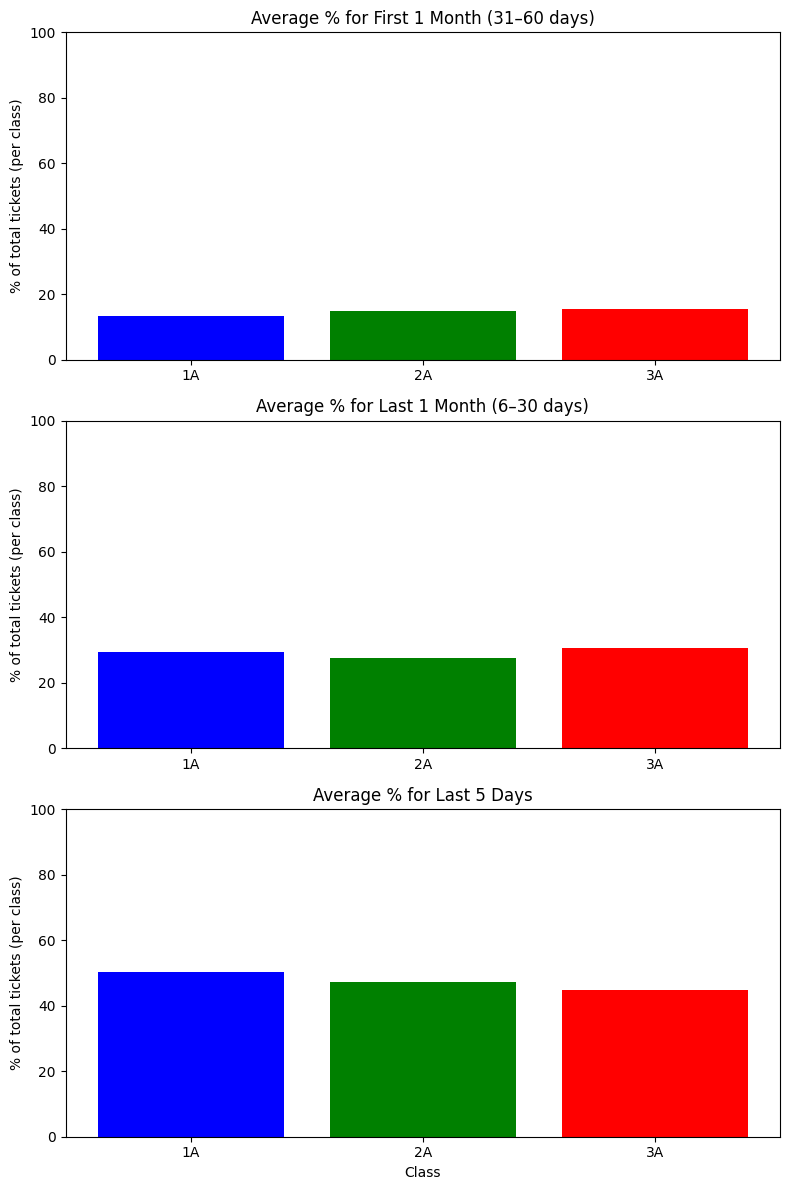

In [39]:
# Convert to datetime
df["booking_date"] = pd.to_datetime(df["booking_date"])
df["journey_date"] = pd.to_datetime(df["journey_date"])

# Clean class column
df["cls"] = df["cls"].str.strip().str.replace("'", "")

# Compute days before departure
df["days_before_departure"] = (df["journey_date"] - df["booking_date"]).dt.days

# Define windows
windows = {
    "Last 5 Days": (0, 5),
    "Last 1 Month (6–30 days)": (6, 30),
    "First 1 Month (31–60 days)": (31, 60)
}

results = []

# Loop over each journey_date separately
for journey_date, group in df.groupby("journey_date"):
    totals = group.groupby("cls")["PSGN"].sum().to_dict()
    
    for window_name, (low, high) in windows.items():
        subset = group[(group["days_before_departure"] >= low) &
                       (group["days_before_departure"] <= high)]
        
        summary = subset.groupby("cls")["PSGN"].sum().reset_index()
        summary["Total_Class_Tickets"] = summary["cls"].map(totals)
        summary["Percentage"] = (summary["PSGN"] / summary["Total_Class_Tickets"] * 100).round(2)
        summary["Window"] = window_name
        summary["journey_date"] = journey_date
        results.append(summary)

# Combine all
analysis_df = pd.concat(results, ignore_index=True)

# Average across all journey dates
avg_analysis = (
    analysis_df.groupby(["cls", "Window"])["Percentage"]
    .mean()
    .reset_index()
    .round(2)
)

print(avg_analysis)

# Plot 3 separate bar graphs
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

for ax, (window, group) in zip(axes, avg_analysis.groupby("Window")):
    ax.bar(group["cls"], group["Percentage"], color=["b", "g", "r"])
    ax.set_title(f"Average % for {window}")
    ax.set_ylabel("% of total tickets (per class)")
    ax.set_ylim(0, 100)

axes[-1].set_xlabel("Class")
plt.tight_layout()
plt.show()
